## Project 1

In [17]:
### Import necessary libraries, setting working directory and fect the data.
import os
import tarfile
import pandas as pd
import numpy as np
from six.moves import urllib

DATA_PATH = "D:/uwa/Machinelearning/Lab04/"
def load_train_data(data_path=DATA_PATH): # a function defined for load train data
 csv_path = os.path.join(data_path, "slump_test.data")
 return pd.read_csv(csv_path)
dataframe = load_train_data()
dataframe.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  103 non-null    int64  
 1   Cement                              103 non-null    float64
 2   Slag                                103 non-null    float64
 3   Fly ash                             103 non-null    float64
 4   Water                               103 non-null    float64
 5   SP                                  103 non-null    float64
 6   Coarse Aggr.                        103 non-null    float64
 7   Fine Aggr.                          103 non-null    float64
 8   SLUMP(cm)                           103 non-null    float64
 9   FLOW(cm)                            103 non-null    float64
 10  Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB

In [4]:
corr_matrix = dataframe.corr()
corr_matrix["Compressive Strength (28-day)(Mpa)"].sort_values(ascending=False)#see page 67

Compressive Strength (28-day)(Mpa)    1.000000
Cement                                0.445725
Fly ash                               0.444393
No                                    0.186274
SP                                   -0.037871
FLOW(cm)                             -0.124029
Fine Aggr.                           -0.154484
Coarse Aggr.                         -0.160684
SLUMP(cm)                            -0.223358
Water                                -0.254235
Slag                                 -0.331588
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [5]:
df_drop_data = dataframe.drop(columns=['SLUMP(cm)','FLOW(cm)'])

In [6]:
df_drop_data.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82


In [7]:
check_nan_in_df = df_drop_data.isnull().values.any()
print (check_nan_in_df)

False


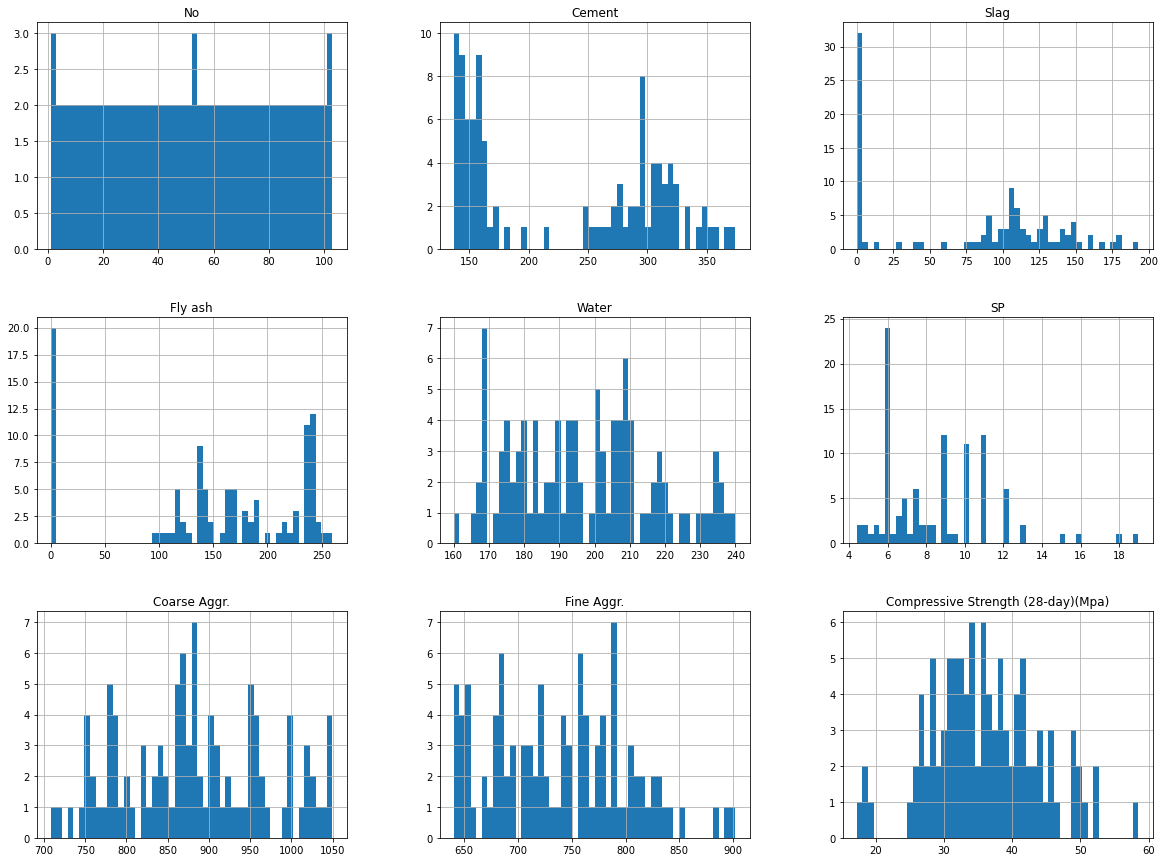

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
df_drop_data.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
df_drop_data.corr().style.background_gradient(cmap="Blues")

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
No,1.000000,-0.031628,-0.079806,0.340834,-0.138476,-0.334644,0.222075,-0.314376,0.186274
Cement,-0.031628,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.445725
Slag,-0.079806,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.331588
Fly ash,0.340834,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,0.444393
Water,-0.138476,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,-0.254235
SP,-0.334644,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.037871
Coarse Aggr.,0.222075,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.160684
Fine Aggr.,-0.314376,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,-0.154484
Compressive Strength (28-day)(Mpa),0.186274,0.445725,-0.331588,0.444393,-0.254235,-0.037871,-0.160684,-0.154484,1.000000


In [10]:
x=df_drop_data.drop("Compressive Strength (28-day)(Mpa)",axis=1)
y=df_drop_data["Compressive Strength (28-day)(Mpa)"]

In [11]:
x.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0


In [12]:
y.head()

0    34.99
1    41.14
2    41.81
3    42.08
4    26.82
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [14]:
trainX.shape,testX.shape

((82, 8), (21, 8))

In [15]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(trainX, trainY)

C:\Users\HP\.conda\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(epsilon=1.5)

In [18]:
from sklearn.metrics import mean_squared_error
strength_predictions_lns = svm_reg.predict(trainX)
lins_mse = mean_squared_error(trainY, strength_predictions_lns)
lins_rmse = np.sqrt(lins_mse)
lins_rmse

3.0345298545933974

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(trainX, trainY)

LinearRegression()

In [20]:
from sklearn.metrics import mean_squared_error
strength_predictions_ln = lin_reg.predict(trainX)
lin_mse = mean_squared_error(trainY, strength_predictions_ln)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.5142018978209184

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(trainX, trainY)

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
from sklearn.metrics import mean_squared_error
strength_predictions_sgd = sgd_reg.predict(trainX)
sgd_mse = mean_squared_error(trainY, strength_predictions_sgd)
sgd_rmse = np.sqrt(sgd_mse)
sgd_rmse

1.3921207908156258e+16

In [25]:
from sklearn.model_selection import cross_val_score
estimators=[('lr', lin_reg),('lsr', svm_reg),('svc', sgd_reg)]
for estimator in estimators:
    scores = cross_val_score(estimator[1],trainX, trainY,scoring='r2',cv=10)
    print(estimator[0],np.round(np.mean(scores),2))

lr 0.83
lsr 0.76
svc -4.989612295113183e+30


C:\Users\HP\.conda\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\.conda\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\.conda\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\.conda\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\.conda\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\.conda\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.p

In [29]:
from sklearn.ensemble import VotingRegressor
voting_clf = VotingRegressor(estimators=[('lr', lin_reg),('lsr', svm_reg),('svc', sgd_reg)])
voting_clf.fit(trainX, trainY)

C:\Users\HP\.conda\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('lsr', LinearSVR(epsilon=1.5)),
                            ('svc', SGDRegressor(eta0=0.1, penalty=None))])

In [30]:
from sklearn.metrics import mean_squared_error
vt_predictions = voting_clf.predict(trainX)
vt_mse = mean_squared_error(trainY, vt_predictions)
vt_rmse = np.sqrt(vt_mse)
vt_rmse

2876053568216940.0

In [31]:
from sklearn.metrics import accuracy_score
for clf in (lin_reg, svm_reg, sgd_reg, voting_clf):
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)
    mse = mean_squared_error(testY, y_pred)
    rmse = np.sqrt(mse) 
    print(clf.__class__.__name__, rmse)

LinearRegression 2.4353701147236766
LinearSVR 2.493069751509976
SGDRegressor 2.15048200819524e+16
VotingRegressor 477384204665382.7


C:\Users\HP\.conda\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\HP\.conda\envs\cits5508-2022\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


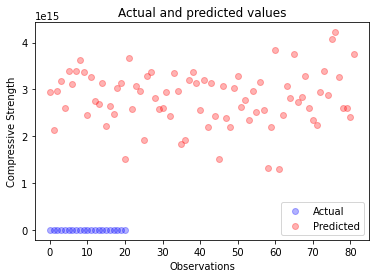

In [32]:
import matplotlib.pyplot as plt #https://www.mikulskibartosz.name/how-to-visualise-prediction-errors/
_, ax = plt.subplots()

ax.scatter(x = range(0, testY.size), y=testY, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, vt_predictions.size), y=vt_predictions, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Compressive Strength')
plt.legend()
plt.show()

## Project 2

In [33]:
def load_UCItrain_data(data_path=DATA_PATH): 
 csv_path = os.path.join(data_path, "abalone.data")
 return pd.read_csv(csv_path,header=None)
dataframe_UCI = load_UCItrain_data()
dataframe_UCI.columns = ["Sex", "Length", "Diameter", "Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
dataframe_UCI.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [34]:
dataframe_UCI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [35]:
dataframe_UCI.shape

(4177, 9)

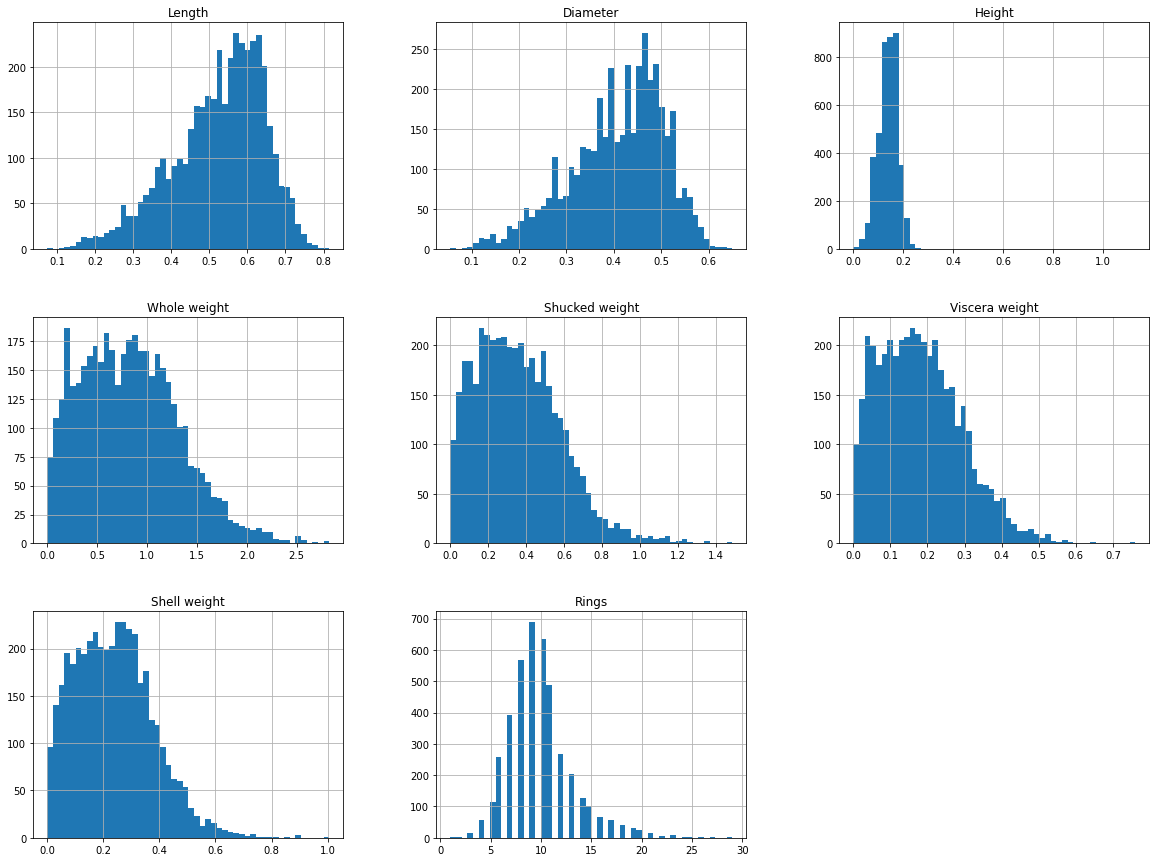

In [36]:
%matplotlib inline 
import matplotlib.pyplot as plt
dataframe_UCI.hist(bins=50, figsize=(20,15))
plt.show()

In [37]:
corr_matrix = dataframe_UCI.corr()
corr_matrix["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

In [38]:
dataframe_UCI_cat = dataframe_UCI[["Sex"]]
dataframe_UCI_cat.head(10)

,Sex
0,M
1,M
2,F
3,M
4,I
5,I
6,F
7,F
8,M
9,F


In [39]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(dtype=int)
dataframe_UCI_cat_encoded = ordinal_encoder.fit_transform(dataframe_UCI_cat)
dataframe_UCI_cat_encoded[:10]

array([[2],
       [2],
       [0],
       [2],
       [1],
       [1],
       [0],
       [0],
       [2],
       [0]])

In [40]:
ordinal_encoder.categories_

[array(['F', 'I', 'M'], dtype=object)]

In [41]:
dataframe_UCI.insert(0,'Sex_oec',dataframe_UCI_cat_encoded)

In [42]:
dataframe_UCI.head()

,Sex_oec,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [43]:
df_dataframe_UCI = dataframe_UCI.drop(columns=['Sex'])

In [44]:
df_dataframe_UCI.corr().style.background_gradient(cmap="Blues")

,Sex_oec,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex_oec,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [45]:
corr_matrix = df_dataframe_UCI.corr()
corr_matrix["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex_oec          -0.034627
Name: Rings, dtype: float64

In [46]:
x_UCI=df_dataframe_UCI.drop("Rings",axis=1)
y_UCI=df_dataframe_UCI["Rings"]

In [47]:
from sklearn.model_selection import train_test_split
trainX_UCI, testX_UCI, trainY_UCI, testY_UCI = train_test_split(x_UCI, y_UCI, test_size = 0.15)

In [51]:
from sklearn.ensemble import RandomForestRegressor
rnd_clf_UCI = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf_UCI.fit(trainX_UCI, trainY_UCI)
y_pred_rf_UCI = rnd_clf_UCI.predict(testX_UCI)
from sklearn.metrics import mean_squared_error
rnd_mse = mean_squared_error(testY_UCI, y_pred_rf_UCI)
rnd_rmse = np.sqrt(rnd_mse)
rnd_rmse

2.3494714522571023

The RMSE is 2.35 approximately.

In [182]:
feat_labels = ["Sex", "Length", "Diameter", "Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
for feature in zip(feat_labels, rnd_clf_UCI.feature_importances_):
    print(feature)

('Sex', 0.004275465998400281)
('Length', 0.005034393370490569)
('Diameter', 0.012610833878638636)
('Height', 0.008075082418250102)
('Whole weight', 0.01989412027191281)
('Shucked weight', 0.13651899194070685)
('Viscera weight', 0.007832675145818098)
('Shell weight', 0.8057584369757825)


In [183]:
for name, score in zip(df_dataframe_UCI, rnd_clf_UCI.feature_importances_):
    print(name, score)

Sex_oec 0.004275465998400281
Length 0.005034393370490569
Diameter 0.012610833878638636
Height 0.008075082418250102
Whole weight 0.01989412027191281
Shucked weight 0.13651899194070685
Viscera weight 0.007832675145818098
Shell weight 0.8057584369757825


In [184]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rnd_clf_UCI, threshold=0.15)
sfm.fit(trainX_UCI, trainY_UCI)

SelectFromModel(estimator=RandomForestRegressor(max_leaf_nodes=16,
                                                n_estimators=500, n_jobs=-1),
                threshold=0.15)

In [185]:
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Shell weight


Before select the features with more than 5% importance there was all 8 features.After selectmodel used, there is only one feature- Shell weight. Its importance is more than 80% as we can "Shell weight 0.8057584369757825".

In [186]:
X_important_train = sfm.transform(trainX_UCI)
X_important_test = sfm.transform(testX_UCI)

In [189]:
rnd_clf_UCI_imp_feature = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf_UCI_imp_feature.fit(X_important_train, trainY_UCI)

RandomForestRegressor(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [190]:
y_pred_rf_UCI_imp = rnd_clf_UCI_imp_feature.predict(X_important_test)

rnd_mse_imp = mean_squared_error(testY_UCI, y_pred_rf_UCI_imp)
rnd_rmse_imp = np.sqrt(rnd_mse_imp)
rnd_rmse_imp

2.3785200890151086

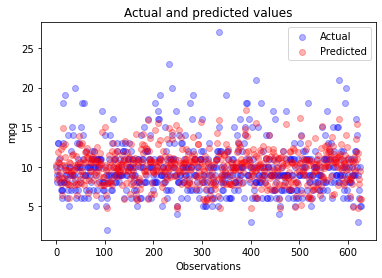

In [193]:
import matplotlib.pyplot as plt #https://www.mikulskibartosz.name/how-to-visualise-prediction-errors/
_, ax = plt.subplots()

ax.scatter(x = range(0, testY_UCI.size), y=testY_UCI, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred_rf_UCI.size), y=y_pred_rf_UCI, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Rings')
plt.legend()
plt.show()

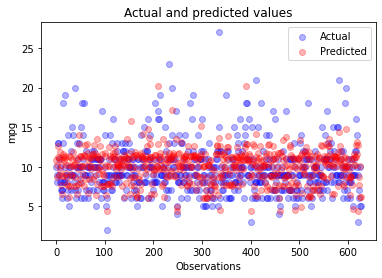

In [192]:
import matplotlib.pyplot as plt #https://www.mikulskibartosz.name/how-to-visualise-prediction-errors/
_, ax = plt.subplots()

ax.scatter(x = range(0, testY_UCI.size), y=testY_UCI, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred_rf_UCI_imp.size), y=y_pred_rf_UCI_imp, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Rings')
plt.legend()
plt.show()

In [195]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bag_clf = BaggingRegressor(DecisionTreeRegressor(splitter="random", max_leaf_nodes=16),n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_clf.fit(trainX_UCI, trainY_UCI)
y_pred_bag = bag_clf.predict(testX_UCI)
rnd_mse_bag = mean_squared_error(testY_UCI, y_pred_bag)
rnd_rmse_bag = np.sqrt(rnd_mse_bag)
rnd_rmse_bag

2.1946442361231147

The first random forest regressor RMSE was 2.35 and the bagging regressor RMSE is 2.19.